# Importing Libraries

In [1]:
!pip install bar_chart_race # Used for displaying data per month in interactive web video
!pip install ffmpeg # Used for compiling video in Python code

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 6.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=74d17162b4533e6301ea6481e496efd3eefc96505c0ba71177c9bc046656ce1f
  Stored in directory: /root/.cache/pip/wheels/30/33/46/5ab7eca55b9490dddbf3441c68a29535996270ef1ce8b9b6d7
Successfully built ffmpeg


In [2]:
#data
import pandas as pd
import numpy as np
import re
#Visulizing
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.io as pio
from scipy.integrate import simps
from numpy import trapz
from numpy import mean
%matplotlib inline
import matplotlib as mpl
from matplotlib import cm
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from datetime import datetime
from palettable.matplotlib import Magma_20_r, Magma_10_r
import re
import random
from copy import copy
import requests
from bs4 import BeautifulSoup
from PIL import Image
from matplotlib.pyplot import figure
import matplotlib.image as image
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import plotly.graph_objects as go
import bar_chart_race as bcr

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Importing Data

In [3]:
Data = pd.read_csv('data.csv')

In [4]:
Data.head()

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87569 entries, 0 to 87568
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Responder_id         87569 non-null  int64 
 1   LanguagesWorkedWith  87569 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


# Data Preprosessing

In [6]:
Data.shape

(87569, 2)

Checking for null values

In [7]:
Data.isnull().sum()

Responder_id           0
LanguagesWorkedWith    0
dtype: int64

In [8]:
j=0
for i in Data['LanguagesWorkedWith'].tolist():
    lst=i.split(';')
    Data['LanguagesWorkedWith'][j]=lst
    j+=1

<ipython-input-8-e99107c17619>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['LanguagesWorkedWith'][j]=lst


Languages and their occurence

In [9]:
from collections import Counter
c=Counter()
for i in Data['LanguagesWorkedWith'].tolist():
    c.update(i)
    
print(len(c))
c

28


Counter({'HTML/CSS': 55466,
         'Java': 35917,
         'JavaScript': 59219,
         'Python': 36443,
         'C++': 20524,
         'C': 18017,
         'C#': 27097,
         'SQL': 47544,
         'VBA': 4781,
         'R': 5048,
         'Bash/Shell/PowerShell': 31991,
         'Ruby': 7331,
         'Rust': 2794,
         'TypeScript': 18523,
         'WebAssembly': 1015,
         'Other(s):': 7920,
         'Go': 7201,
         'PHP': 23030,
         'Assembly': 5833,
         'Kotlin': 5620,
         'Swift': 5744,
         'Objective-C': 4191,
         'Elixir': 1260,
         'Erlang': 777,
         'Clojure': 1254,
         'F#': 973,
         'Scala': 3309,
         'Dart': 1683})

Top ten famous languages

In [10]:
famous = c.most_common(10)
famous

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523)]

Number of languages

In [11]:
number_languages = len(c)
print('Number of languages =', number_languages)


Number of languages = 28


#Adding another Dataset

In [12]:
Lang_pd = pd.read_csv('Most Popular Programming Languages from 2004 to 2020.csv')

In [13]:
Lang_pd.head()

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.36,0.38,9.97,4.86,0.44,0.0,2.89,0.0,0.03,...,18.77,2.60,0.40,0.35,0.08,0.03,0.0,0.0,1.49,8.84
1,August 2004,0.37,0.38,9.65,5.20,0.48,0.0,2.78,0.0,0.07,...,18.88,2.75,0.42,0.41,0.10,0.03,0.0,0.0,1.52,8.96
2,September 2004,0.43,0.43,9.46,5.29,0.53,0.0,2.77,0.0,0.08,...,18.93,2.84,0.42,0.43,0.11,0.03,0.0,0.0,1.62,8.82
3,October 2004,0.42,0.39,9.16,5.43,0.55,0.0,2.84,0.0,0.09,...,18.92,2.99,0.43,0.47,0.12,0.04,0.0,0.0,1.65,8.70
4,November 2004,0.39,0.39,9.37,5.40,0.57,0.0,2.85,0.0,0.08,...,19.02,2.93,0.43,0.46,0.14,0.04,0.0,0.0,1.55,8.50


#Preprocessing new dataset

In [14]:
Lang_pd.isnull().sum()

Date            0
Abap            0
Ada             0
C/C++           0
C#              0
Cobol           0
Dart            0
Delphi          0
Go              0
Groovy          0
Haskell         0
Julia           0
Kotlin          0
Java            0
Javascript      0
Lua             0
Matlab          0
Objective-C     0
Perl            0
PHP             0
Python          0
R               0
Ruby            0
Rust            0
Scala           0
Swift           0
TypeScript      0
VBA             0
Visual Basic    0
dtype: int64

In [15]:
#Convering the date to Datetime data type
Lang_pd['Date'] = pd.to_datetime(Lang_pd['Date'])

# #Setting date as index
# Lang_pd.set_index('Date', inplace = True)
Lang_pd.head()

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,2004-07-01,0.36,0.38,9.97,4.86,0.44,0.0,2.89,0.0,0.03,...,18.77,2.60,0.40,0.35,0.08,0.03,0.0,0.0,1.49,8.84
1,2004-08-01,0.37,0.38,9.65,5.20,0.48,0.0,2.78,0.0,0.07,...,18.88,2.75,0.42,0.41,0.10,0.03,0.0,0.0,1.52,8.96
2,2004-09-01,0.43,0.43,9.46,5.29,0.53,0.0,2.77,0.0,0.08,...,18.93,2.84,0.42,0.43,0.11,0.03,0.0,0.0,1.62,8.82
3,2004-10-01,0.42,0.39,9.16,5.43,0.55,0.0,2.84,0.0,0.09,...,18.92,2.99,0.43,0.47,0.12,0.04,0.0,0.0,1.65,8.70
4,2004-11-01,0.39,0.39,9.37,5.40,0.57,0.0,2.85,0.0,0.08,...,19.02,2.93,0.43,0.46,0.14,0.04,0.0,0.0,1.55,8.50


In [16]:
Lang_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          194 non-null    datetime64[ns]
 1   Abap          194 non-null    float64       
 2   Ada           194 non-null    float64       
 3   C/C++         194 non-null    float64       
 4   C#            194 non-null    float64       
 5   Cobol         194 non-null    float64       
 6   Dart          194 non-null    float64       
 7   Delphi        194 non-null    float64       
 8   Go            194 non-null    float64       
 9   Groovy        194 non-null    float64       
 10  Haskell       194 non-null    float64       
 11  Julia         194 non-null    float64       
 12  Kotlin        194 non-null    float64       
 13  Java          194 non-null    float64       
 14  Javascript    194 non-null    float64       
 15  Lua           194 non-null    float64   

In [17]:
n = len(Lang_pd.columns)
print("number of languages =" , n)


number of languages = 29


Checking for Null Values

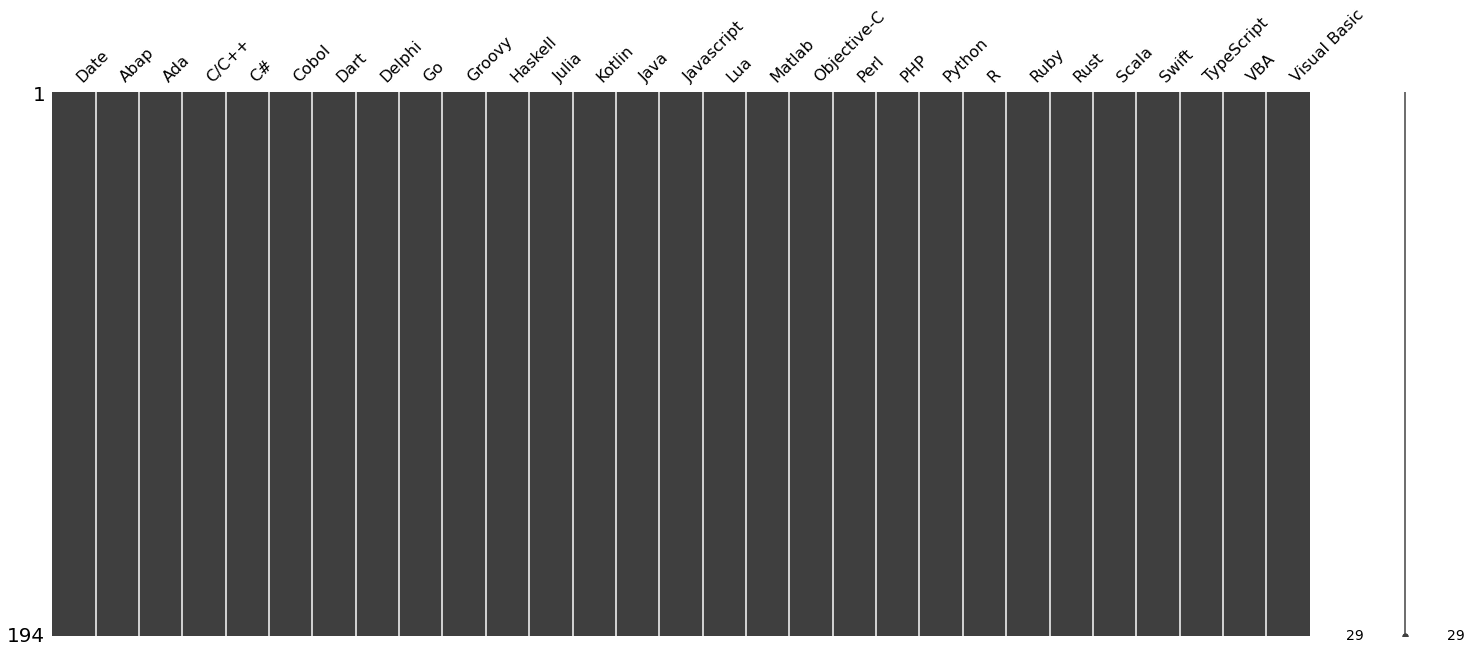

In [18]:
import missingno as miss

miss.matrix(Lang_pd)

We can see that there are no missing values in the data.

In [19]:
Lang_pd.describe()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.498814,0.295928,8.412010,7.647268,0.383969,0.100825,1.098299,0.272371,0.330722,0.301598,...,14.505825,11.063093,2.029691,2.160670,0.206959,0.528299,1.055103,0.405309,1.701701,3.857062
std,0.102133,0.079515,1.778675,1.309938,0.073387,0.116980,0.764734,0.395568,0.139438,0.038870,...,4.727871,7.989862,1.311785,0.694323,0.179043,0.442681,1.388318,0.640866,0.323910,2.192946
min,0.320000,0.170000,5.720000,4.860000,0.250000,0.000000,0.220000,0.000000,0.030000,0.210000,...,5.780000,2.600000,0.390000,0.350000,0.050000,0.010000,0.000000,0.000000,1.190000,0.820000
25%,0.400000,0.230000,7.630000,6.600000,0.320000,0.000000,0.390000,0.000000,0.252500,0.280000,...,10.917500,5.147500,0.835000,1.667500,0.080000,0.130000,0.000000,0.000000,1.460000,1.662500
50%,0.500000,0.285000,8.025000,7.355000,0.380000,0.110000,0.890000,0.065000,0.370000,0.300000,...,15.025000,8.155000,1.730000,2.510000,0.120000,0.405000,0.000000,0.010000,1.630000,3.880000
75%,0.580000,0.350000,9.152500,8.927500,0.440000,0.130000,1.737500,0.365000,0.447500,0.320000,...,19.205000,13.685000,3.407500,2.660000,0.302500,1.000000,2.460000,0.595000,1.832500,5.357500
max,0.730000,0.540000,12.980000,10.000000,0.580000,0.570000,2.890000,1.390000,0.520000,0.400000,...,20.320000,31.880000,4.190000,3.010000,0.910000,1.350000,3.590000,1.960000,2.550000,8.960000


Number of Languages in dataset

In [20]:
print(Lang_pd.dtypes)

Date            datetime64[ns]
Abap                   float64
Ada                    float64
C/C++                  float64
C#                     float64
Cobol                  float64
Dart                   float64
Delphi                 float64
Go                     float64
Groovy                 float64
Haskell                float64
Julia                  float64
Kotlin                 float64
Java                   float64
Javascript             float64
Lua                    float64
Matlab                 float64
Objective-C            float64
Perl                   float64
PHP                    float64
Python                 float64
R                      float64
Ruby                   float64
Rust                   float64
Scala                  float64
Swift                  float64
TypeScript             float64
VBA                    float64
Visual Basic           float64
dtype: object


#Visulizing

Set of color and grid style

In [21]:
PALETTE = "magma_r" # my favourite palettes: flare, CMRmap_r, magma_r
sns.set(style="darkgrid")

# function that generates n color values out of defined PALETTE
def generate_color_series(n):
    segments = cm.get_cmap(PALETTE, n)
    return segments(range(n))

Top 10 mean popular languages

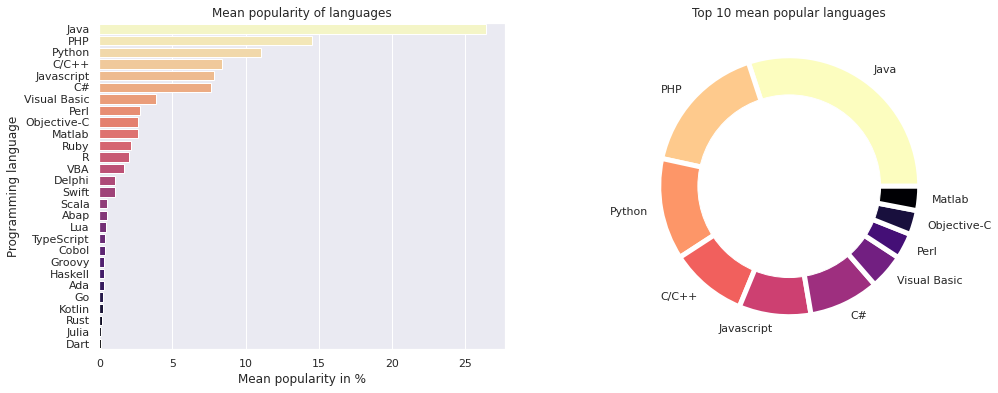

In [22]:
data_mean_list = []

for col in Lang_pd:
    if col == "Date":
        pass
    else:
        data_mean_list.append([col, Lang_pd[col].mean()])

data_mean = pd.DataFrame(data_mean_list, columns = ["language", "mean"])
data_mean = data_mean.sort_values(by=["mean"], ascending=False)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title("Mean popularity of languages")
sns.barplot(data=data_mean, x="mean", y="language", palette=generate_color_series(28))
plt.xlabel("Mean popularity in %")
plt.ylabel("Programming language")
plt.subplot(1, 2, 2)
data_mean_top10 = data_mean.nlargest(10, "mean")
plt.title("Top 10 mean popular languages")
donut_top10 = plt.Circle( (0,0), 0.7, color='white')
plt.pie(data_mean_top10["mean"],labels=data_mean_top10["language"], wedgeprops = {"linewidth": 5, "edgecolor": "white"}, colors=generate_color_series(10))
p = plt.gcf()
p.gca().add_artist(donut_top10)

plt.show()

Popularity of all languages

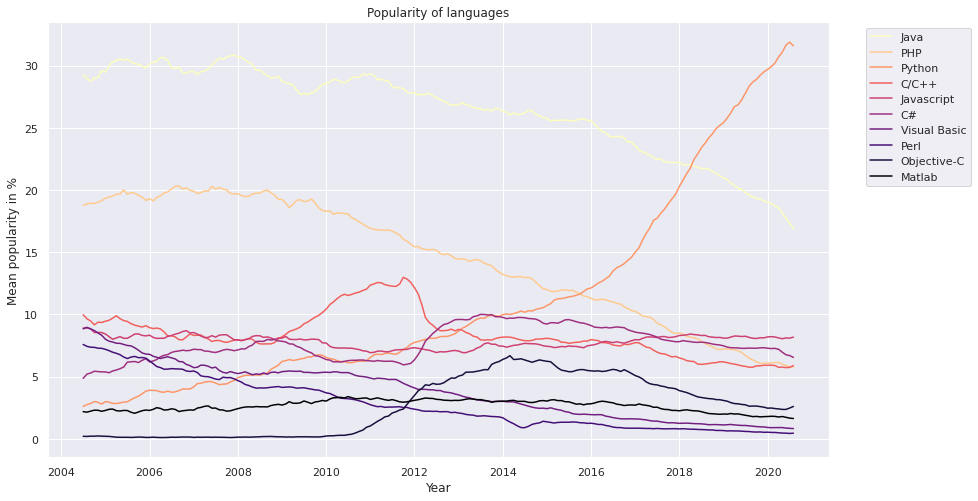

In [23]:
top10_linechart_color = generate_color_series(10)
plt.figure(figsize=(14, 8))
for index, element in enumerate(data_mean["language"]):
    plt.plot(Lang_pd["Date"], Lang_pd[element], color=top10_linechart_color[index], label=element)
    
    plt.legend()
    if index == 9:
        break
plt.title("Popularity of languages")
plt.xlabel("Year")
plt.ylabel("Mean popularity in %")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [24]:
# #Convering the date to Datetime data type
# Lang_pd['Date'] = pd.to_datetime(Lang_pd['Date'])

# #Setting date as index
Lang_pd.set_index('Date', inplace = True)

Figuring out top 10 languages using Mean

In [25]:
mask = Lang_pd.mean() > 2.5

Lang_pd = Lang_pd.loc[:, mask]

clms = Lang_pd.columns.tolist()
clms

['C/C++',
 'C#',
 'Java',
 'Javascript',
 'Matlab',
 'Objective-C',
 'Perl',
 'PHP',
 'Python',
 'Visual Basic']

Popularity of Python

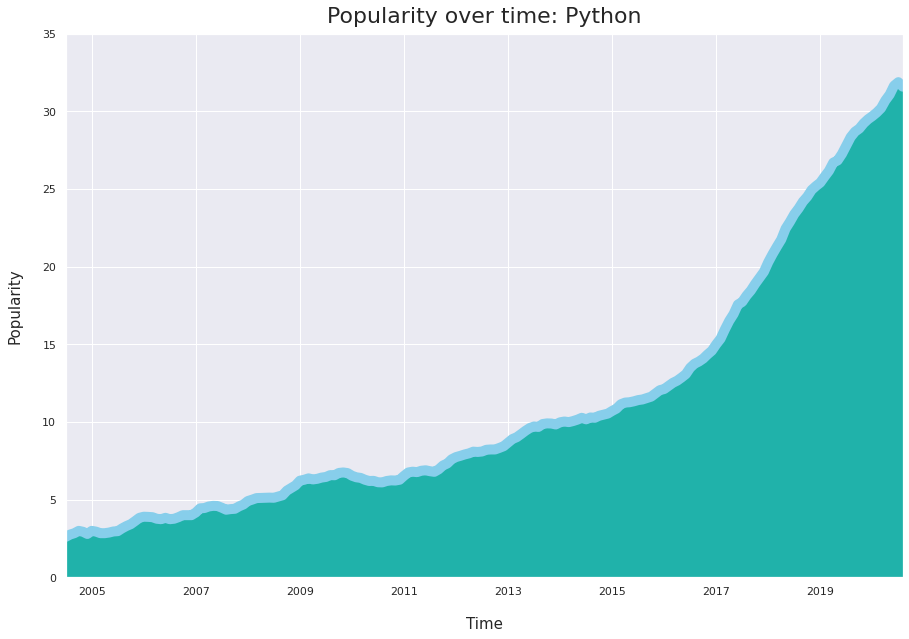

In [26]:
Lang_pd['Python'].plot(kind="line",figsize=(15,10),color='skyblue',linewidth=10)
title = plt.title("Popularity over time: Python",fontsize=22)
title.set_position([.5, 1.009])
plt.xlabel("Time",fontsize=15,labelpad=20)
plt.ylabel("Popularity",fontsize=15, labelpad=20)
plt.fill_between(x=Lang_pd.index.values,y1=Lang_pd['Python'].values,color='lightseagreen')
axes = plt.gca()
axes.set_ylim([0,35])
plt.show()

Popularity of C/C++

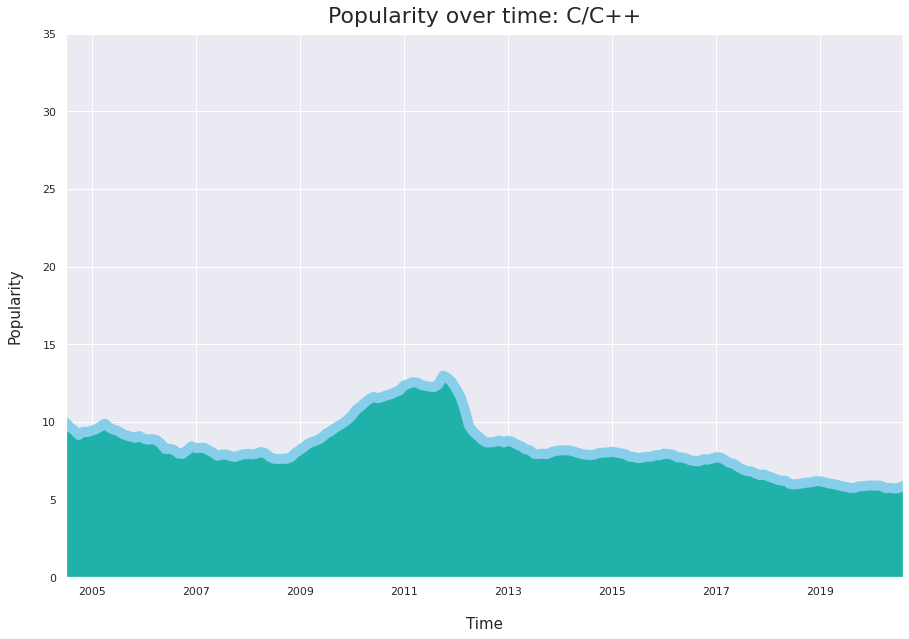

In [27]:
Lang_pd['C/C++'].plot(kind="line",figsize=(15,10),color='skyblue',linewidth=10)
title = plt.title("Popularity over time: C/C++",fontsize=22)
title.set_position([.5, 1.009])
plt.xlabel("Time",fontsize=15,labelpad=20)
plt.ylabel("Popularity",fontsize=15, labelpad=20)
plt.fill_between(x=Lang_pd.index.values,y1=Lang_pd['C/C++'].values,color='lightseagreen')
axes = plt.gca()
axes.set_ylim([0,35])
plt.show()

Popularity of C#

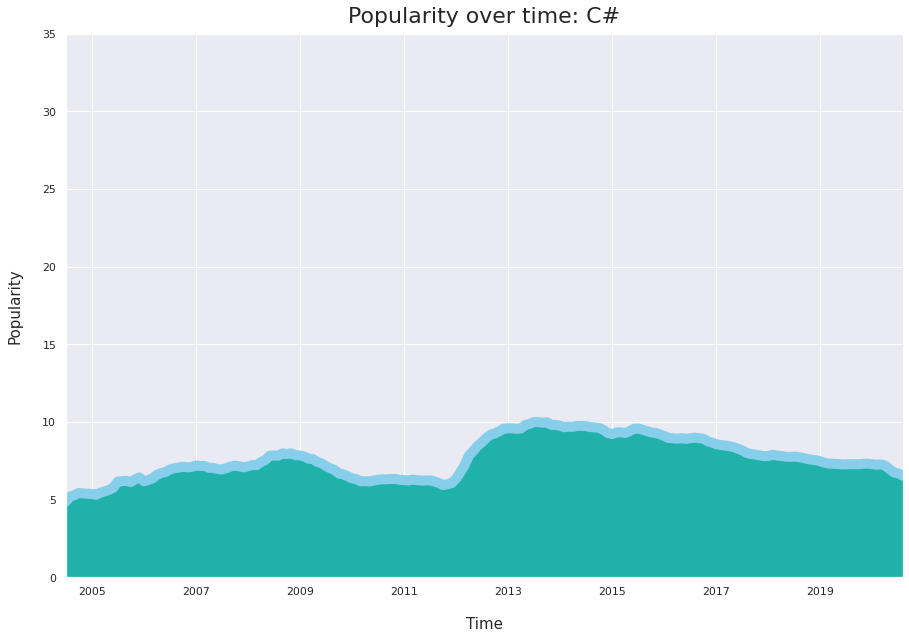

In [28]:
Lang_pd['C#'].plot(kind="line",figsize=(15,10),color='skyblue',linewidth=10)
title = plt.title("Popularity over time: C#",fontsize=22)
title.set_position([.5, 1.009])
plt.xlabel("Time",fontsize=15,labelpad=20)
plt.ylabel("Popularity",fontsize=15, labelpad=20)
plt.fill_between(x=Lang_pd.index.values,y1=Lang_pd['C#'].values,color='lightseagreen')
axes = plt.gca()
axes.set_ylim([0,35])
plt.show()

Popularity of Java

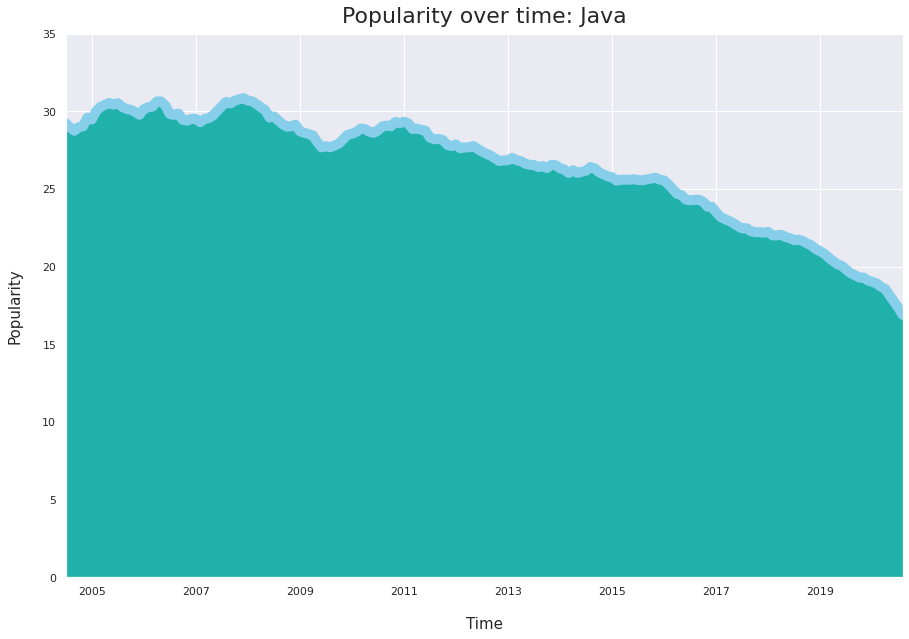

In [29]:
Lang_pd['Java'].plot(kind="line",figsize=(15,10),color='skyblue',linewidth=10)
title = plt.title("Popularity over time: Java",fontsize=22)
title.set_position([.5, 1.009])
plt.xlabel("Time",fontsize=15,labelpad=20)
plt.ylabel("Popularity",fontsize=15, labelpad=20)
plt.fill_between(x=Lang_pd.index.values,y1=Lang_pd['Java'].values,color='lightseagreen')
axes = plt.gca()
axes.set_ylim([0,35])
plt.show()

Popularity of PHP

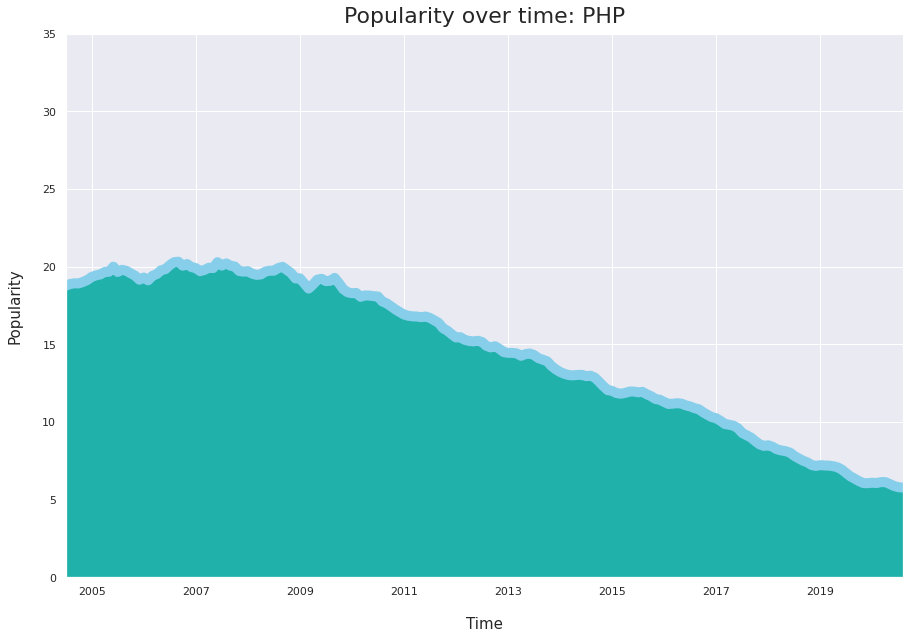

In [30]:
Lang_pd['PHP'].plot(kind="line",figsize=(15,10),color='skyblue',linewidth=10)
title = plt.title("Popularity over time: PHP",fontsize=22)
title.set_position([.5, 1.009])
plt.xlabel("Time",fontsize=15,labelpad=20)
plt.ylabel("Popularity",fontsize=15, labelpad=20)
plt.fill_between(x=Lang_pd.index.values,y1=Lang_pd['PHP'].values,color='lightseagreen')
axes = plt.gca()
axes.set_ylim([0,35])
plt.show()

Popularity of Javascript 

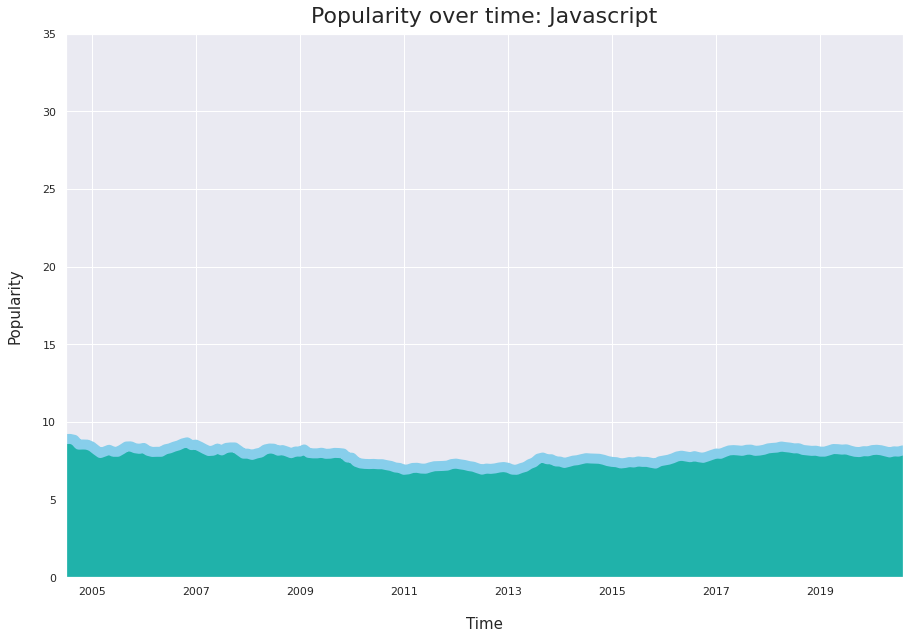

In [31]:
Lang_pd['Javascript'].plot(kind="line",figsize=(15,10),color='skyblue',linewidth=10)
title = plt.title("Popularity over time: Javascript",fontsize=22)
title.set_position([.5, 1.009])
plt.xlabel("Time",fontsize=15,labelpad=20)
plt.ylabel("Popularity",fontsize=15, labelpad=20)
plt.fill_between(x=Lang_pd.index.values,y1=Lang_pd['Javascript'].values,color='lightseagreen')
axes = plt.gca()
axes.set_ylim([0,35])
plt.show()

Popularity of Visual Basic

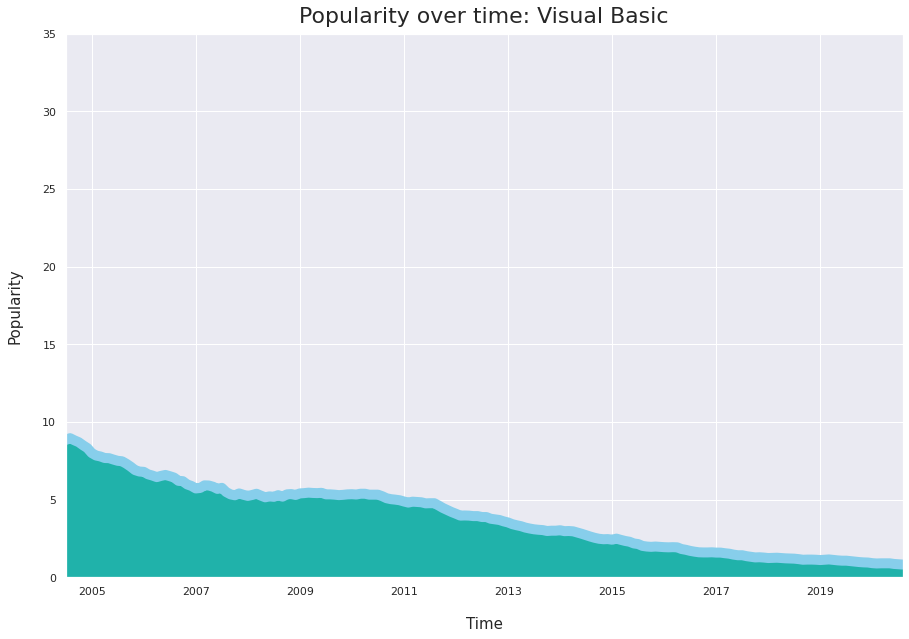

In [32]:
Lang_pd['Visual Basic'].plot(kind="line",figsize=(15,10),color='skyblue',linewidth=10)
title = plt.title("Popularity over time: Visual Basic",fontsize=22)
title.set_position([.5, 1.009])
plt.xlabel("Time",fontsize=15,labelpad=20)
plt.ylabel("Popularity",fontsize=15, labelpad=20)
plt.fill_between(x=Lang_pd.index.values,y1=Lang_pd['Visual Basic'].values,color='lightseagreen')
axes = plt.gca()
axes.set_ylim([0,35])
plt.show()

In [45]:
programming_languages = []
popularity_mean = []
popularity_simps = []
popularity_trapz = []

for i in Lang_pd.columns:
    programming_languages.append(i)
    popularity_mean.append(mean(Lang_pd[i].values))
    popularity_simps.append(simps(Lang_pd[i].values))
    popularity_trapz.append(trapz(Lang_pd[i].values))

popularity_list = list(zip(popularity_mean,popularity_simps,popularity_trapz))
popularity_df = pd.DataFrame(popularity_list, columns=['Mean','Simpsons','Trapezoidal'],index=programming_languages)
popularity_df.head(2)

,Mean,Simpsons,Trapezoidal
C/C++,8.412010,1623.966667,1624.005
C#,7.647268,1477.910833,1477.870


Moving average with a window of 10

In [46]:
Lang_pd_mov = pd.DataFrame()
for i in Lang_pd.columns:
    Lang_pd_mov[i] = Lang_pd[i].rolling(window=10).mean()
#remove first 9 rows which are NaN now
Lang_pd_mov = Lang_pd_mov.iloc[9:]

In [47]:
top_ten_mean = popularity_df.nlargest(10,'Mean')['Mean']
top_ten_simps = popularity_df.nlargest(10,'Simpsons')['Simpsons']
top_ten_trapz = popularity_df.nlargest(10,'Trapezoidal')['Trapezoidal']
results_list = [top_ten_mean,top_ten_simps,top_ten_trapz]

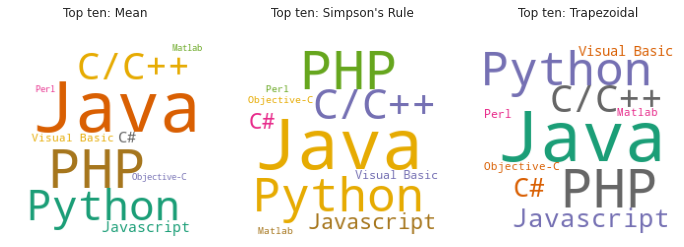

In [48]:
def wordclouds_tiled(n, df_list):
    plt.figure(figsize=(12,12))
    j = np.ceil(n/3)
    subtitles = ["Mean","Simpson's Rule","Trapezoidal"]
    for t in range(n):
        i=t+1
        title = plt.subplot(j, 3, i).set_title("Top ten: " + subtitles[t])
        plt.plot()
        title.set_position([.5, 1.1])
        plt.imshow(WordCloud(background_color="white",width=200,height=200,prefer_horizontal=1,colormap='Dark2').generate_from_frequencies(frequencies=df_list[t]))
        plt.axis("off")
    plt.show()

wordclouds_tiled(3,results_list)

Top 10 programming languages 2004

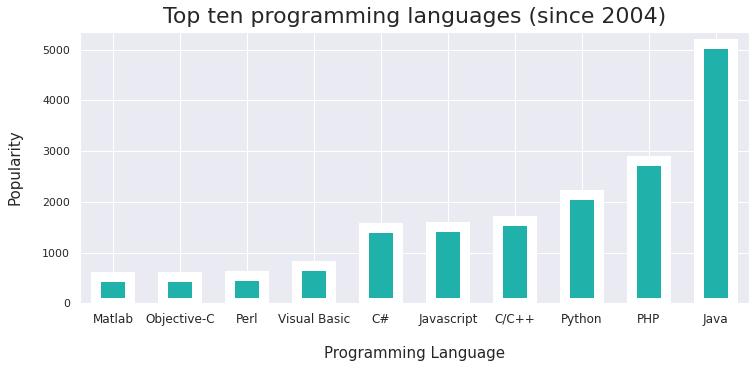

In [49]:
top_ten_simps.sort_values(ascending=True).plot(kind="bar",figsize=(12,5),color='lightseagreen',linewidth=10)
title = plt.title("Top ten programming languages (since 2004)",fontsize=22)
title.set_position([.5, 1.009])
plt.xticks(size=12,rotation=0, horizontalalignment="center")
plt.xlabel("Programming Language",fontsize=15,labelpad=20)
plt.ylabel("Popularity",fontsize=15, labelpad=20)
plt.show()

Programming Languages Score (May 2021)

In [50]:
Lang_pd.tail(1).T.values.flatten()

array([ 5.88,  6.54, 16.9 ,  8.17,  1.63,  2.6 ,  0.45,  5.78, 31.59,
        0.82])

In [51]:
df_popular = pd.DataFrame({'Languages':Lang_pd.tail(1).T.index, 'Popularity':Lang_pd.tail(1).T.values.flatten()})

In [52]:
df_popular

,Languages,Popularity
0,C/C++,5.88
1,C#,6.54
2,Java,16.90
3,Javascript,8.17
4,Matlab,1.63
5,Objective-C,2.60
6,Perl,0.45
7,PHP,5.78
8,Python,31.59
9,Visual Basic,0.82


In [53]:
fig = px.pie(df_popular, values='Popularity', names='Languages',
             title='Programming Languages Score (May 2021)')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Languages with popularity for Data one

In [54]:
x=[i[0] for i in famous]
y=[i[1] for i in famous]

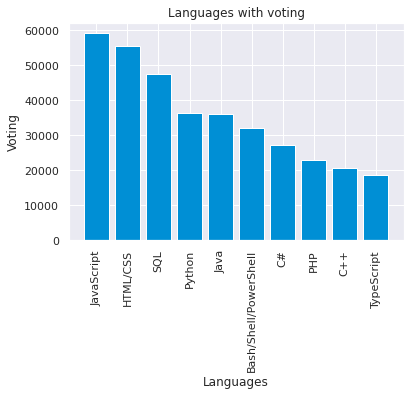

In [55]:
plt.bar(x,y,color='#008fd5')
plt.title("Languages with popularity")
plt.xticks(rotation='vertical')
plt.xlabel("Languages")
plt.ylabel("Voting")
plt.title("Languages with voting")
plt.show()

Top 10 Programming Languages (2004 - 2021)

In [44]:
bcr.bar_chart_race(df=Lang_pd, n_bars=10, figsize=(6, 6), filter_column_colors=True, title='Top 10 Programming Languages (2004 - 2021)', filename=None)